In [1]:
from oneshot import model

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 64)      76864     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 200, 200, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      921664    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100, 100, 64)      0         
__________

In [2]:
from oneshot import network

In [3]:
training_dir = "./clean_data"
testing_dir = "./test"
batch_size = 40

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

Found 400 images belonging to 40 classes.


In [20]:
import matplotlib.pyplot as plt
train = train_generator.next()
#train

In [21]:
import collections
collections.Counter(train[1])

Counter({21.0: 2,
         9.0: 1,
         26.0: 2,
         25.0: 3,
         12.0: 1,
         30.0: 1,
         20.0: 1,
         38.0: 2,
         1.0: 2,
         6.0: 2,
         36.0: 2,
         32.0: 1,
         33.0: 1,
         19.0: 3,
         24.0: 1,
         18.0: 1,
         3.0: 2,
         39.0: 1,
         34.0: 2,
         28.0: 1,
         23.0: 1,
         22.0: 2,
         14.0: 1,
         31.0: 1,
         35.0: 1,
         15.0: 2})

In [22]:
train_x,train_y = train[0],train[1]

In [23]:
import numpy as np

In [24]:
train_left_input = np.zeros((20,200,200,3))
train_right_input = np.zeros((20,200,200,3))
for i in range(20):
    #print(train_x[i].shape)
    train_left_input[i] = train_x[i]
    train_right_input[i] = train_x[i+20]

In [25]:
from keras.optimizers import Adam
network.compile(optimizer=Adam(lr=0.000001),loss='binary_crossentropy')

In [26]:
train_output = np.zeros((20,))
for i in range(20):
    if train_y[i] == train_y[i+20]:
        train_output[i] = 1
    else:
        train_output[i] = 0

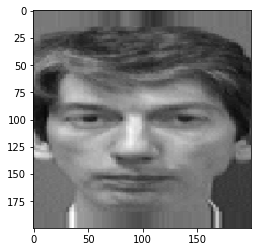

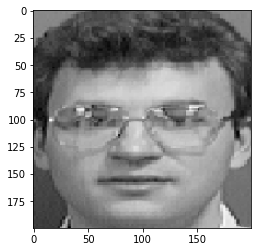

0.0


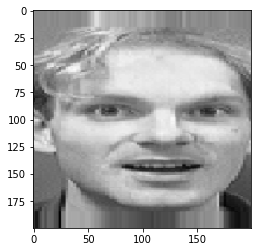

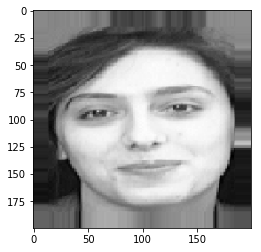

0.0


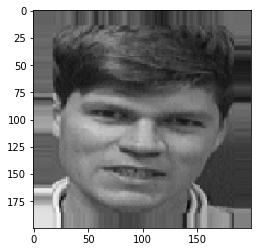

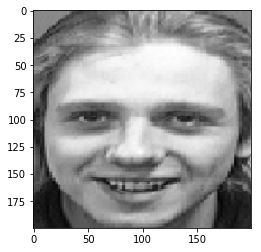

0.0


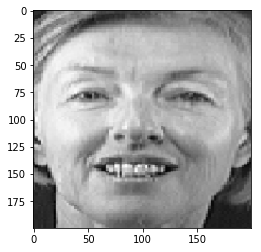

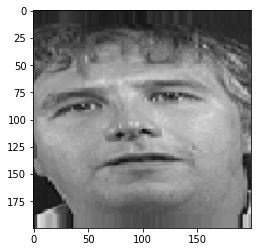

0.0


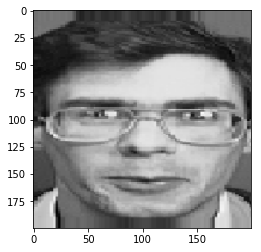

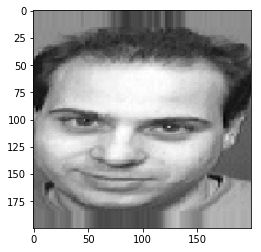

0.0


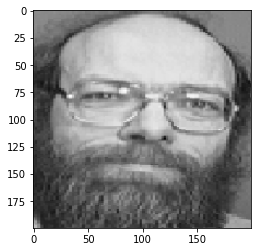

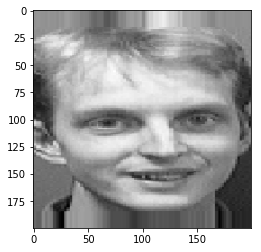

0.0


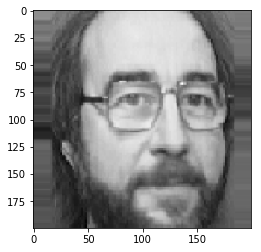

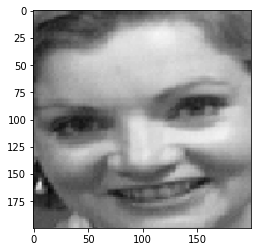

0.0


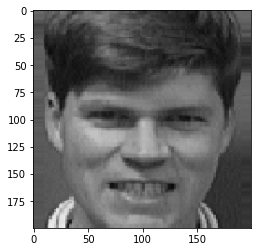

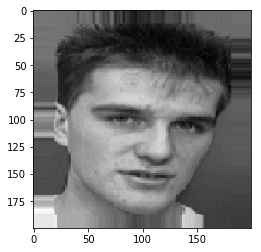

0.0


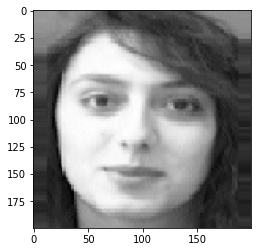

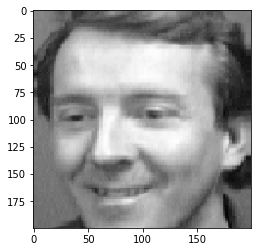

0.0


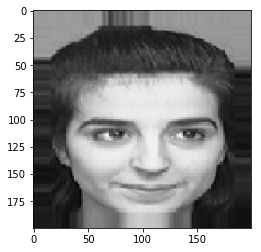

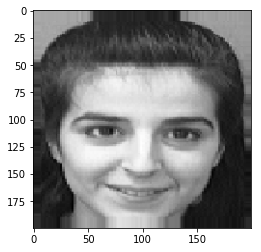

1.0


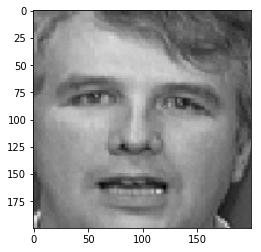

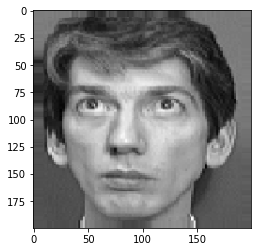

0.0


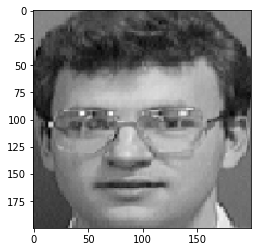

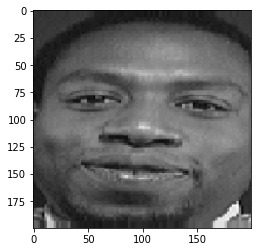

0.0


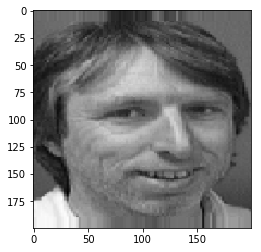

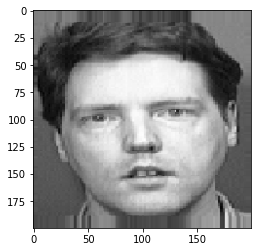

0.0


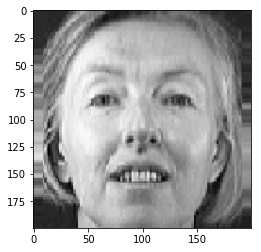

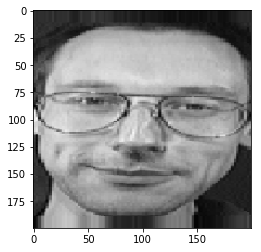

0.0


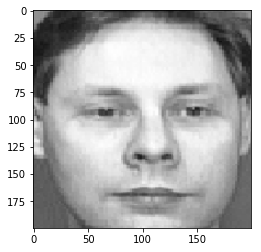

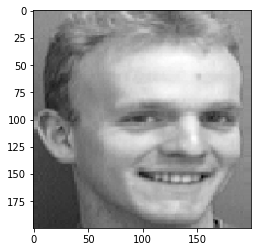

0.0


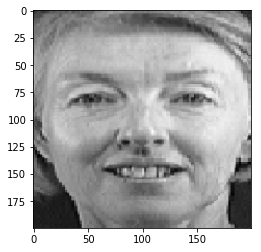

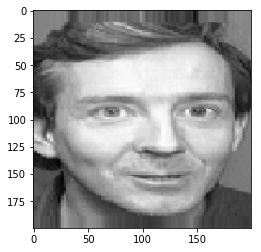

0.0


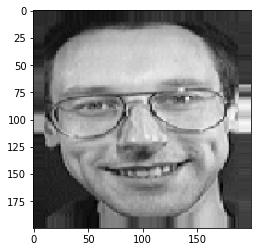

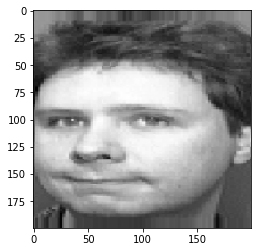

0.0


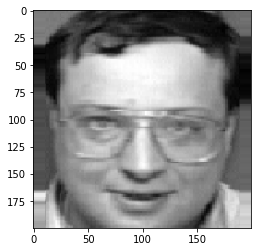

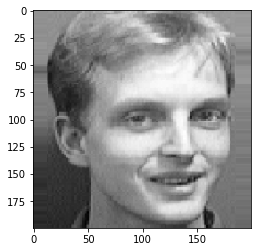

0.0


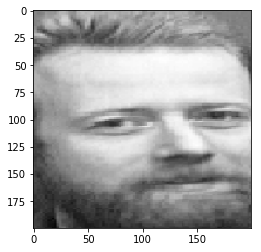

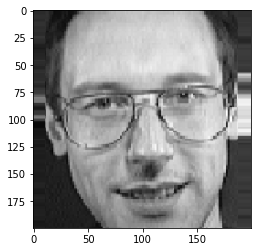

0.0


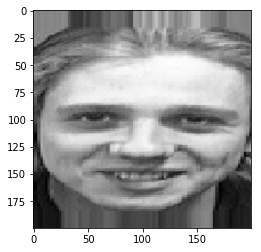

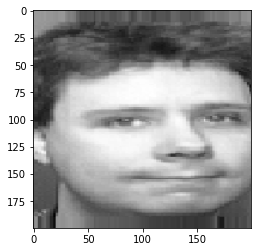

0.0


In [27]:
for i in range(20):
    plt.imshow(train_left_input[i])
    plt.show()
    plt.imshow(train_right_input[i])
    plt.show()
    print(train_output[i])

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

network.fit([train_left_input,train_right_input],train_output,epochs=20,callbacks=callbacks_list)


Epoch 1/20
